In [1]:
import numpy as np
import pandas as pd

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [74]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [14]:
athlete = pd.read_csv('../data/raw/athlete_events.csv')

In [15]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
athlete = athlete.dropna()

In [20]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


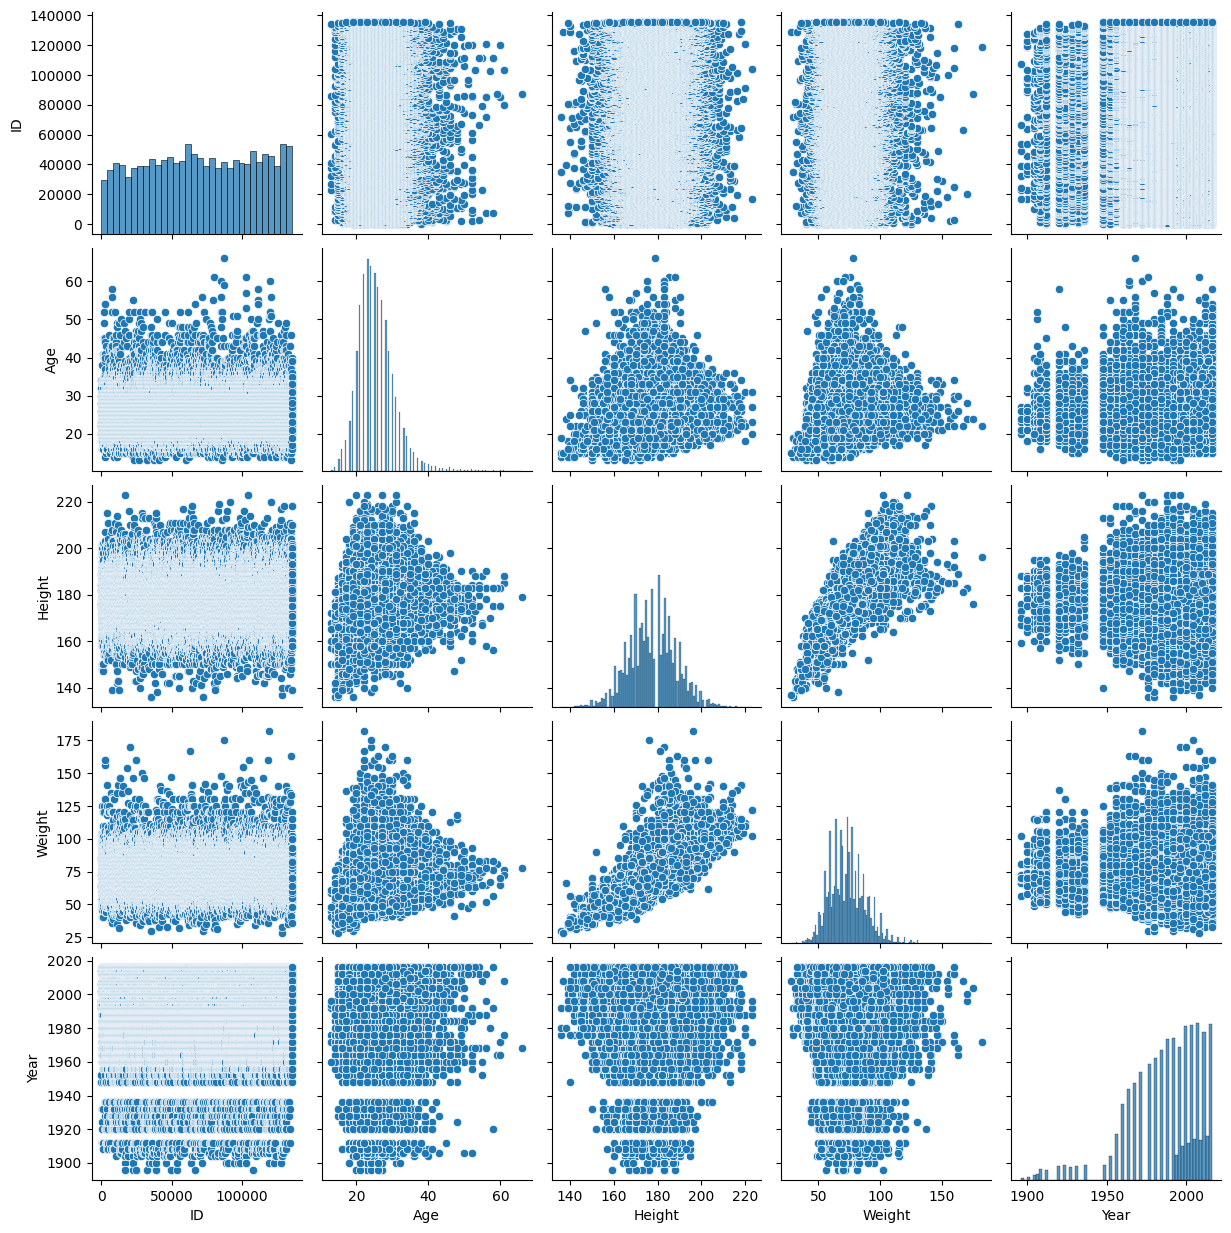

In [23]:
sns.pairplot(athlete);

In [29]:
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [37]:
athlete = athlete.drop(columns= ['ID','NOC'])

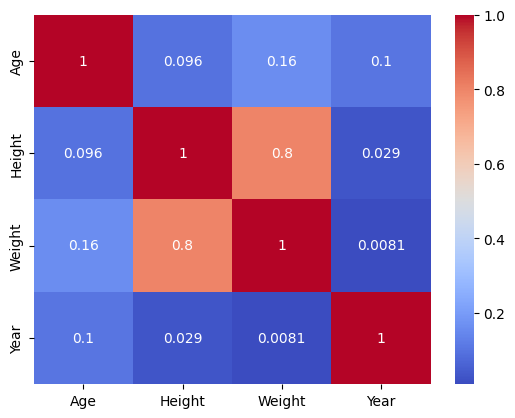

In [38]:
sns.heatmap(athlete.corr(numeric_only=True), annot=True,cmap='coolwarm');

In [39]:
athlete.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
label = LabelEncoder() #mujer 1, hombre 0
athlete['Sex_encoder'] = label.fit_transform(athlete['Sex'])

In [45]:
athlete['Sport'].nunique()

55

In [47]:
athlete['Sport'].unique()

array(['Ice Hockey', 'Gymnastics', 'Alpine Skiing', 'Rowing', 'Football',
       'Fencing', 'Taekwondo', 'Athletics', 'Canoeing', 'Handball',
       'Water Polo', 'Wrestling', 'Sailing', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Swimming', 'Boxing', 'Basketball',
       'Nordic Combined', 'Diving', 'Baseball', 'Volleyball',
       'Speed Skating', 'Cross Country Skiing', 'Bobsleigh',
       'Modern Pentathlon', 'Curling', 'Judo', 'Rugby Sevens', 'Tennis',
       'Rhythmic Gymnastics', 'Weightlifting', 'Equestrianism',
       'Badminton', 'Beach Volleyball', 'Ski Jumping', 'Shooting',
       'Short Track Speed Skating', 'Biathlon', 'Synchronized Swimming',
       'Freestyle Skiing', 'Triathlon', 'Luge', 'Table Tennis',
       'Snowboarding', 'Skeleton', 'Rugby', 'Archery', 'Tug-Of-War',
       'Trampolining', 'Lacrosse', 'Golf', 'Art Competitions'],
      dtype=object)

In [48]:
label = LabelEncoder() #deportes
athlete['Sport_encoder'] = label.fit_transform(athlete['Sport'])

In [51]:
athlete['Event'].nunique()

562

In [52]:
athlete['Event'].nunique()

562

In [53]:
label = LabelEncoder() #deportes
athlete['Event_encoder'] = label.fit_transform(athlete['Event'])

In [67]:
label = LabelEncoder() #meallas
athlete['Medal_encoder'] = label.fit_transform(athlete['Medal'])

In [80]:
athlete.head(5)

,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,Sex_encoder,Sport_encoder,Medal_encoder
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Bronze,1,25,0
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Bronze,1,22,0
42,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,1,22,1
44,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,1,22,1
48,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,1,22,1


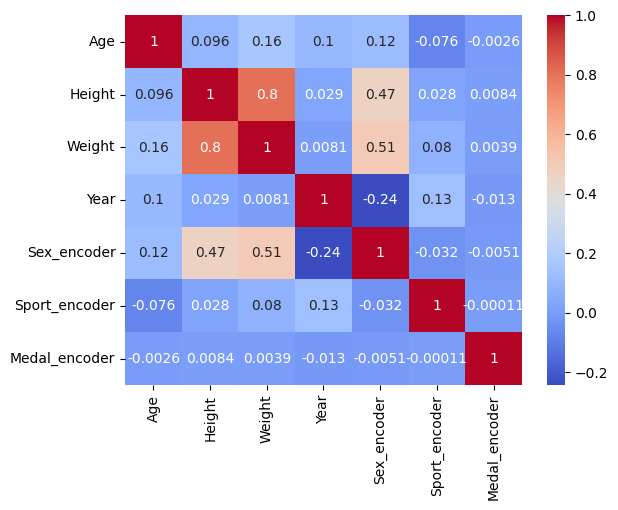

In [81]:
sns.heatmap(athlete.corr(numeric_only=True), annot=True,cmap='coolwarm');

In [82]:
athlete.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Medal', 'Sex_encoder', 'Sport_encoder',
       'Medal_encoder'],
      dtype='object')

In [65]:
athlete = athlete.drop(columns='Event_encoder')

In [ ]:
##Relacion: Height y Weight -- Las más altas pesan más


In [83]:
X = athlete[['Age','Height','Weight','Year','Sport_encoder']]
y = athlete[['Medal_encoder']]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [85]:
print(X_train.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(24144, 5)
(24144, 5)
(6037, 1)
(24144, 1)


In [87]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=13)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=13)

In [88]:
tree_reg.score(X_train,y_train)

0.00096172396391625

In [96]:
predicts = tree_reg.predict(X_test)

In [94]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [98]:
print('MAE:',mean_absolute_error(y_test, predicts))
print('MSE:',mean_squared_error(y_test, predicts))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicts)))


MAE: 0.6725113759030192
MSE: 0.6655615432912163
RMSE: 0.8158195531434732
